In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the dataset
data = pd.read_csv('BostonHousing.csv')  # Ensure the CSV file is in the working directory

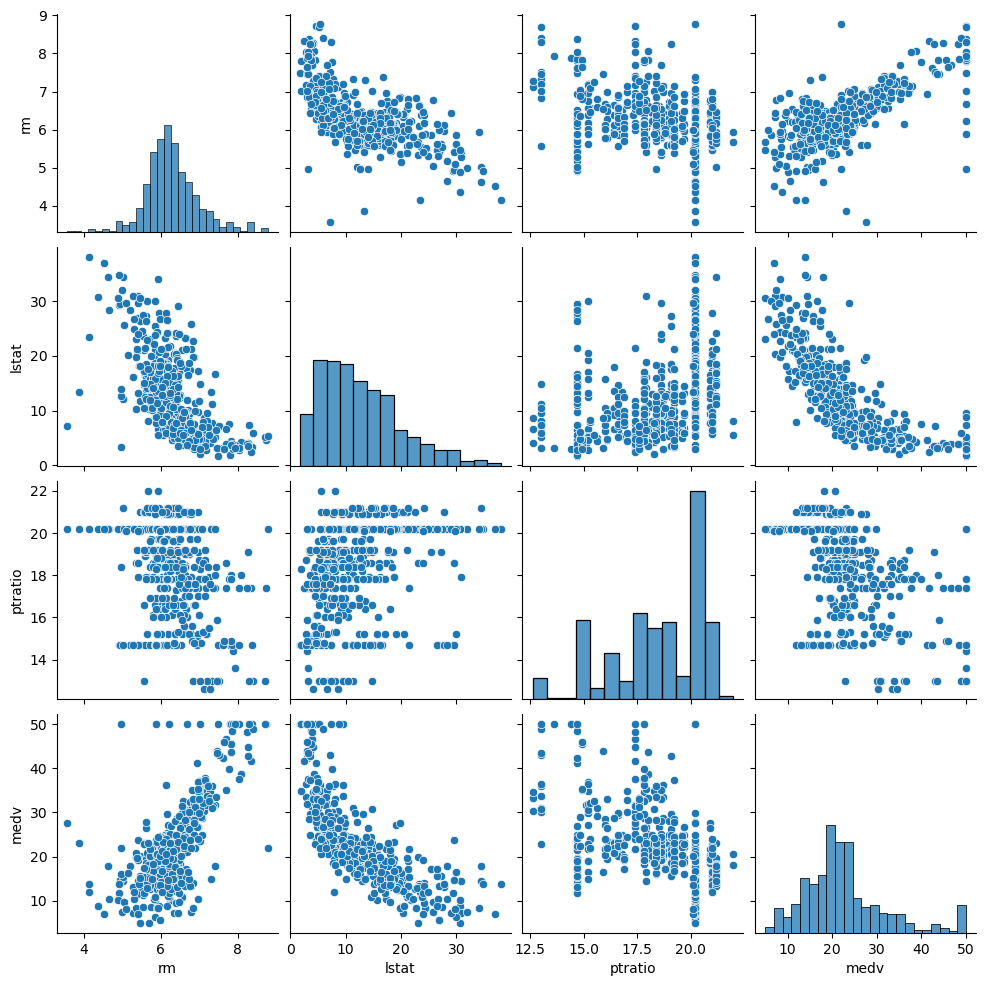

In [3]:
# Visualize the dataset
data.head()
sns.pairplot(data[['rm', 'lstat', 'ptratio', 'medv']])  # Selected features visualization
plt.show()

In [4]:
# Separate features and target variable
X = data.drop(columns=['medv'])  # Features
y = data['medv']  # Target


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalize the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Build the DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1)  # Output layer for regression
])

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 604.8478 - mae: 22.5770 - val_loss: 512.7331 - val_mae: 21.0711
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 540.0632 - mae: 21.2856 - val_loss: 476.9343 - val_mae: 20.1812
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 507.5587 - mae: 20.5468 - val_loss: 433.6076 - val_mae: 19.0707
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 465.1516 - mae: 19.1904 - val_loss: 380.5235 - val_mae: 17.6545
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 402.1354 - mae: 17.6515 - val_loss: 317.1004 - val_mae: 15.9104
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 350.8049 - mae: 16.2939 - val_loss: 246.3259 - val_mae: 13.7431
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 247.6124 - mae: 13.4510 - val_loss: 176.6443 - val_mae: 11.2726
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 208.0324 - mae: 11.5327 - val_loss: 113.9430 - val_mae: 8.5269
Epoch 9/50
11/11 ━━

In [9]:
# Step 8: Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss: 16.2200
Test MAE: 2.5633


In [10]:
# Step 9: Make predictions
predictions = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [11]:
# Step 10: Display some predictions
for i in range(5):
    print(f"True Value: {y_test.iloc[i]:.2f}, Predicted Value: {predictions[i][0]:.2f}")

True Value: 23.60, Predicted Value: 28.34
True Value: 32.40, Predicted Value: 34.70
True Value: 13.60, Predicted Value: 21.99
True Value: 22.80, Predicted Value: 27.86
True Value: 16.10, Predicted Value: 16.65


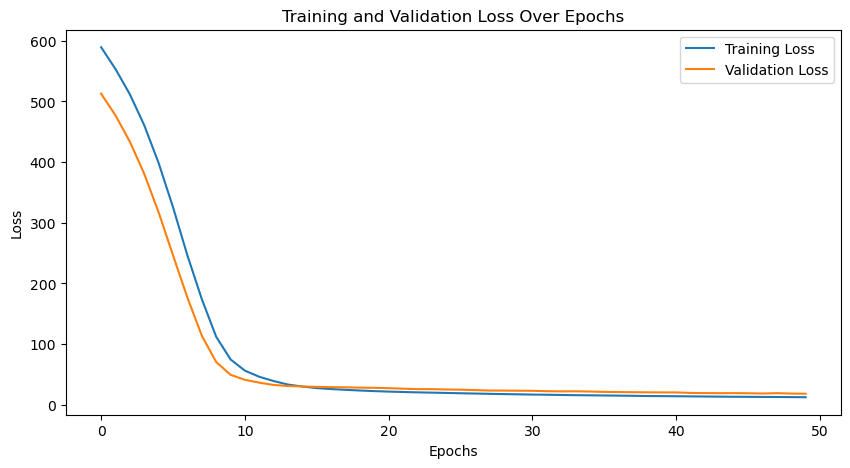

In [12]:
# Step 11: Visualization of training progress
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

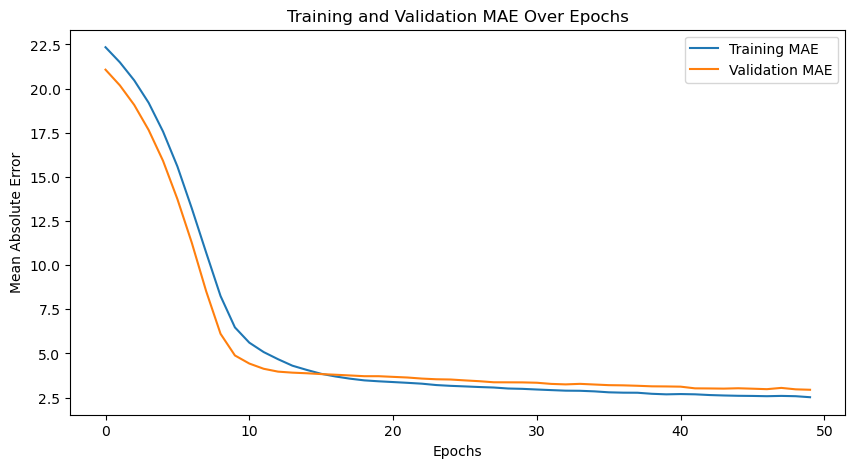

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE Over Epochs')
plt.legend()
plt.show()

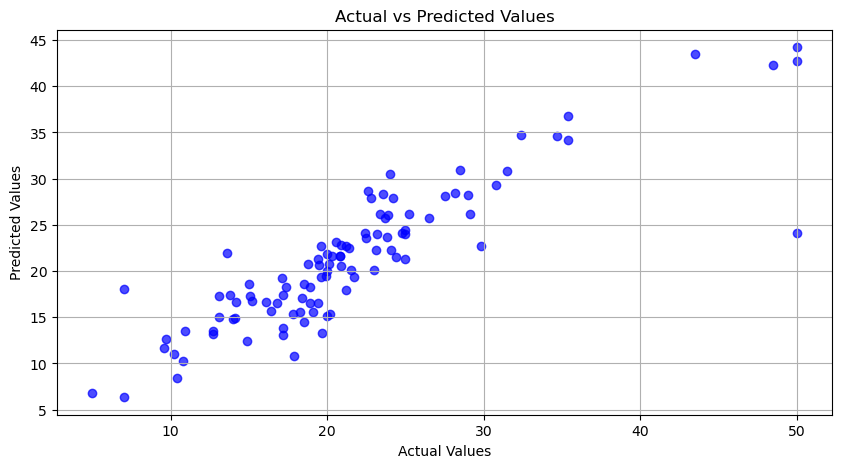

In [14]:
# Step 12: Visualizing the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions, alpha=0.7, color='b')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()